In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
data = pd.read_csv("C:\\Users\\Tab & Tech\\Downloads\\dummy_data.csv")

In [5]:
data

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [6]:
data.isna().count

<bound method DataFrame.count of        age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
995  False   False       False     False      False     False         False   
996  False   False       False     False      False     False         False   
997  False   False       False     False      False     False         False   
998  False   False       False     False      False     False         False   
999  False   False       False     False      False     False         False   

     profession  i

In [7]:
data

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [8]:
data.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [11]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['time_spent'] = label_encoder.fit_transform(data['time_spent'])
data['platform'] = label_encoder.fit_transform(data['platform'])
data['interests'] = label_encoder.fit_transform(data['interests'])
data['location'] = label_encoder.fit_transform(data['location'])
data['demographics'] = label_encoder.fit_transform(data['demographics'])
data['profession'] = label_encoder.fit_transform(data['profession'])
data['income'] = label_encoder.fit_transform(data['income'])
data['indebt'] = label_encoder.fit_transform(data['indebt'])
data['isHomeOwner'] = label_encoder.fit_transform(data['isHomeOwner'])
data['Owns_Car'] = label_encoder.fit_transform(data['Owns_Car'])

In [13]:
X = data.drop(columns=['time_spent'])
y = data['time_spent']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [19]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 6.445508
Mean Absolute Error: 2.1603


In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
y_mean = np.mean(y_train)
y_pred_baseline = np.full_like(y_test, y_mean)

In [22]:
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

In [23]:
print("Baseline Mean Squared Error:", mse_baseline)
print("Baseline Mean Absolute Error:", mae_baseline)

Baseline Mean Squared Error: 6.335
Baseline Mean Absolute Error: 2.135


Baseline Mean Squared Error: 6.335
Baseline Mean Absolute Error: 2.135


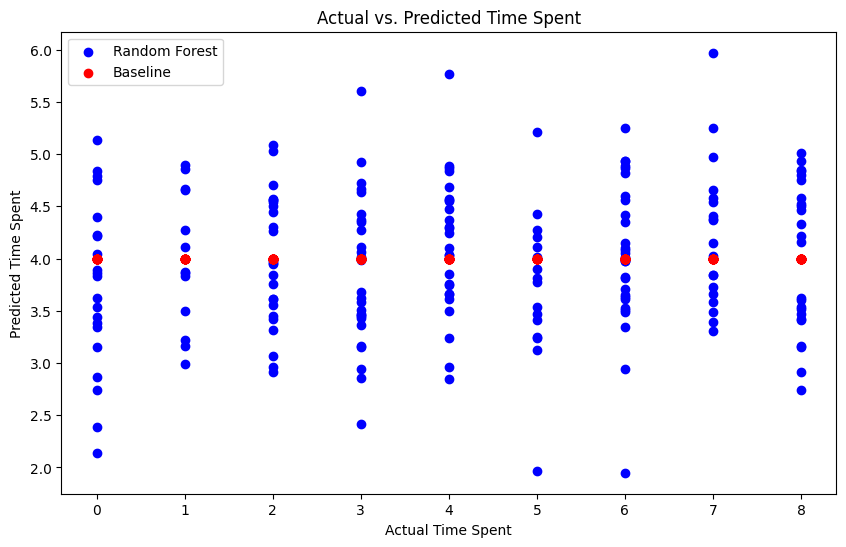

In [45]:
print("Baseline Mean Squared Error:", mse_baseline)
print("Baseline Mean Absolute Error:", mae_baseline)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Random Forest')
plt.scatter(y_test, y_pred_baseline, color='red', label='Baseline')
plt.xlabel('Actual Time Spent')
plt.ylabel('Predicted Time Spent')
plt.title('Actual vs. Predicted Time Spent')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [26]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [27]:
best_model = grid_search.best_estimator_

In [28]:
y_pred_best = best_model.predict(X_test)

Best Model Mean Squared Error: 6.345064684444696
Best Model Mean Absolute Error: 2.14123811441244


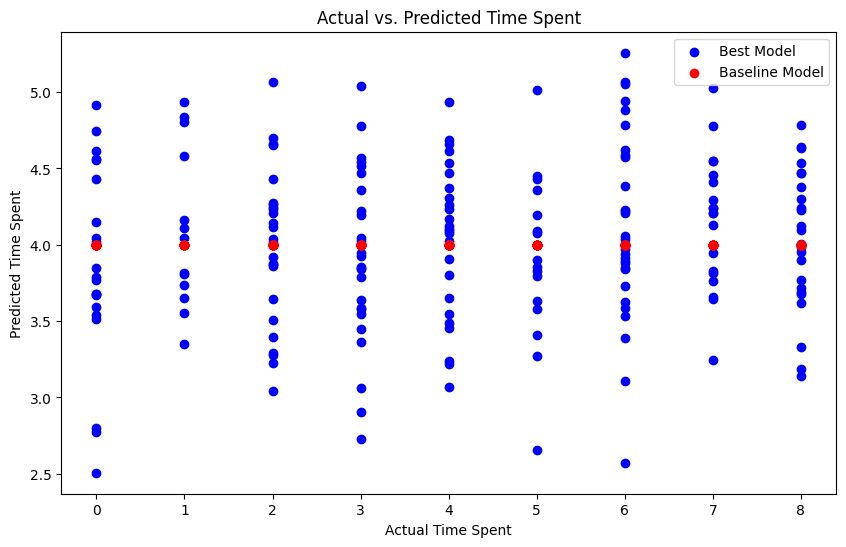

In [43]:
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
print("Best Model Mean Squared Error:", mse_best)
print("Best Model Mean Absolute Error:", mae_best)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', label='Best Model')
plt.scatter(y_test, y_pred_baseline, color='red', label='Baseline Model')
plt.xlabel('Actual Time Spent')
plt.ylabel('Predicted Time Spent')
plt.title('Actual vs. Predicted Time Spent')
plt.legend()
plt.show()

Gradient Boosting Regressor Mean Squared Error: 6.425987200039037
Gradient Boosting Regressor Mean Absolute Error: 2.1287836097285493


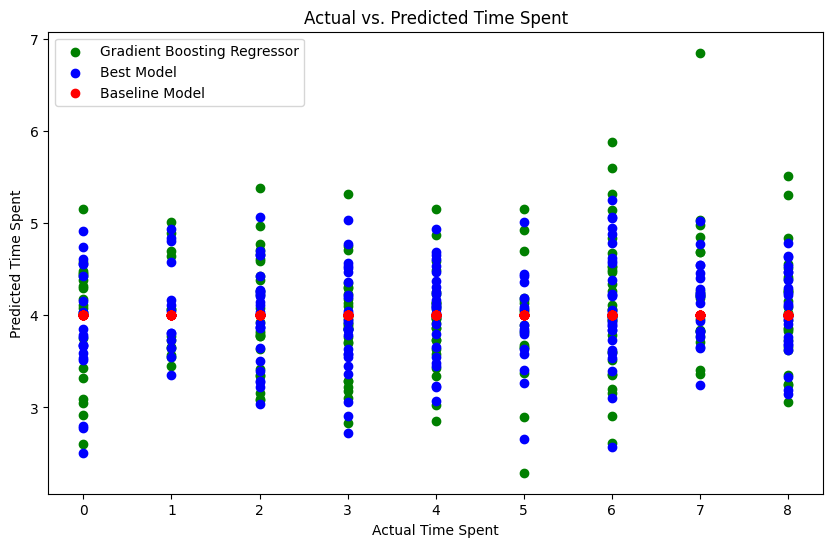

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("Gradient Boosting Regressor Mean Squared Error:", mse_gbr)
print("Gradient Boosting Regressor Mean Absolute Error:", mae_gbr)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='green', label='Gradient Boosting Regressor')
plt.scatter(y_test, y_pred_best, color='blue', label='Best Model')
plt.scatter(y_test, y_pred_baseline, color='red', label='Baseline Model')
plt.xlabel('Actual Time Spent')
plt.ylabel('Predicted Time Spent')
plt.title('Actual vs. Predicted Time Spent')
plt.legend()
plt.show()


In [35]:
ndata = pd.read_csv("C:\\Users\\Tab & Tech\\Downloads\\dummy_data.csv")  # Load new data
# Apply the same preprocessing steps as before
ndata = ndata.drop(columns=["time_spent"])
ndata['gender'] = label_encoder.fit_transform(data['gender'])
ndata['time_spent'] = label_encoder.fit_transform(data['time_spent'])
ndata['platform'] = label_encoder.fit_transform(data['platform'])
ndata['interests'] = label_encoder.fit_transform(data['interests'])
ndata['location'] = label_encoder.fit_transform(data['location'])
ndata['demographics'] = label_encoder.fit_transform(data['demographics'])
ndata['profession'] = label_encoder.fit_transform(data['profession'])
ndata['income'] = label_encoder.fit_transform(data['income'])
ndata['indebt'] = label_encoder.fit_transform(data['indebt'])
ndata['isHomeOwner'] = label_encoder.fit_transform(data['isHomeOwner'])
ndata['Owns_Car'] = label_encoder.fit_transform(data['Owns_Car'])

In [37]:
missing_columns = set(X.columns) - set(ndata.columns)
for column in missing_columns:
    ndata[column] = 0

In [38]:
ndata = ndata[X.columns]

In [39]:
ndata_scaled = scaler.transform(ndata)

In [40]:
new_predictions = gbr_model.predict(ndata_scaled)
print("Predictions:", new_predictions)

Predictions: [3.48811108 2.91159831 4.13016205 3.37399349 3.4985153  3.86949302
 4.03501732 3.76736534 4.20085297 3.02780864 4.26256176 4.18075142
 3.88489602 3.95234809 4.50568572 4.16528661 4.72899087 6.39304647
 4.36677986 2.6911049  3.54806444 4.71528102 4.23982588 4.4837317
 3.88624579 4.25272108 3.10345726 3.52212528 4.27321257 3.7879177
 3.09011128 3.91641775 4.32412388 3.73249329 5.18865429 3.24102426
 5.1113546  4.30084463 2.91227374 4.14447901 4.06091232 5.04963933
 3.95762922 4.75698811 4.03958173 3.68863526 4.23669581 3.86729962
 3.60669248 3.69595963 3.86921234 1.90813252 6.7340244  2.58079952
 3.89658763 5.31655795 2.4919361  2.52123121 5.59329997 4.1058942
 3.6963601  2.67299253 4.53891024 3.77644422 4.84476808 4.24132478
 2.84849997 3.73397979 3.25490258 3.73346527 3.93022894 3.53222137
 3.91665684 2.04682846 5.34249034 3.55242155 3.83057663 2.84119065
 3.35787117 4.2961404  3.40060036 3.91533962 3.32676605 4.45696958
 2.84708978 3.83155254 3.90416586 3.22530518 3.78656